# Exercises for the 16th March 2021

Kim Antunez

<mark>Ces exercices portent principalement sur les 2 premiers exercices vus en classe lors de la dernière séance.</mark> 

# Exercise 1 : ER graphs

In [1]:
import networkx as nx
import random

import matplotlib.pyplot as plt

import itertools #package utile pour faire des analyses

import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout as layout

random.seed(1)
np.random.seed(1)

## 1. 10 replicas of ER graphs 

<mark>1-Generate 10 replicas of ER graphs with N=1000 nodes and connection probabilities p=[0.00005, 0.0001, 0.0002, 0.001, 0.002,0.005, 0.01,0.015, 0.02]</mark>

In [2]:
# parameters
N=1000
pList=[0.00005,0.0001,0.0002,0.001,0.002,0.005,0.01,0.015,0.02]
nRepl=10 #je répète mon expérience 10 fois

On construit un modèle (avec différentes réplications) pour chaque valeur de p. 
On doit donc faire deux boucles.
1. un sur les probabilités
2. une sur les réplications

La meilleure chose à faire est de générer tous les graphes  en amont pour ne pas avoir à les recréer si on cherche à réaliser d'autres mesures. 

In [3]:
print("Nombre de graphes à générer : ",len(pList)*nRepl)

Nombre de graphes à générer :  90


In [4]:
# the list of graphs is now a dictionary: I will have a list for each value of the parameter p
listGraphs={}

#loop on the values for the parameter p
for p in pList:
    #print (p) #to be sure that I'm not too slow
    listGraphs[p]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs[p].append(G)

## 2. Show  $\langle k\rangle=Np$

<mark>2- show visually and with a linear fit that $\langle k\rangle=Np$</mark>

Je veux créer une liste où j'obtiens pour chaque p la **moyenne du degré moyen** sur 10 réplications. 

In [5]:
avK=[]
for p in pList:
    thisAverage=[]
    for G in listGraphs[p]:
        avK_G = np.mean([degree for node, degree in G.degree()])
        thisAverage.append(avK_G)
    print(p, np.mean(thisAverage))
    avK.append(np.mean(thisAverage))

5e-05 0.049
0.0001 0.1
0.0002 0.19779999999999998
0.001 1.0070000000000001
0.002 1.9846
0.005 4.974
0.01 10.027800000000003
0.015 14.9098
0.02 20.0194


Je trace la relation entre p et le degré moyen. C'est linéaire. Je le vois en faisant un fit. 

In [6]:
coef = np.polyfit(pList,avK, 1) #1 c'est le degré : linéaire
poly1d_fn = np.poly1d(coef) 

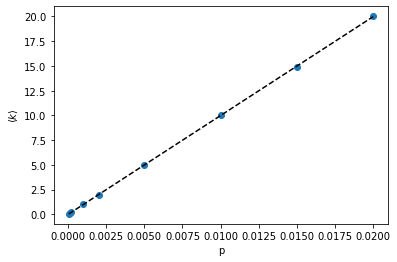

In [7]:
plt.plot(pList,avK,'o')
plt.plot(pList, poly1d_fn(pList), '--k')

plt.xlabel('p')
plt.ylabel(r'$\langle k\rangle$')

plt.show()

On retrouve bien la relation linéaire présentée dans le cours à savoir : 

$$\langle k\rangle= p(N-1)$$

In [8]:
coef[0]

999.1715895423181

In [9]:
(N-1)

999

## 3. Giant component

<mark>3- Are the networks connected? Which is the size of the giant component?  Plot size of the giant component as a function of p. What do you observe?</mark>

Tout d'abord quelques définitions sur ce que sont les composantes et en particulier la composante géante. 

Une **composante** est un sous graphe dans lesquels il y a un chemin qui relie chaque paire de noeuds. Elles ressemblent à des petites îles au sein du graphe et ne sont, par définition, par reliées entre elles. L'exemple suivant comporte 3 composantes. 

![](https://qph.fs.quoracdn.net/main-qimg-8eea92c00b763dc167745c3f06cfe5bd)

La **composante géante** est une composante qui comporte beaucoup plus de noeuds que les autres composantes du graphe, elle ne se définit pas vraiment mathématiquement par un certain seuil, il s'agit davantage d'un concept. 

[Source](https://www.quora.com/What-is-the-giant-component-in-graph-theory)

Nous générons à titre d'exemple un graphe et représentons avec un trait épais et rouge sa composante la plus grande. 

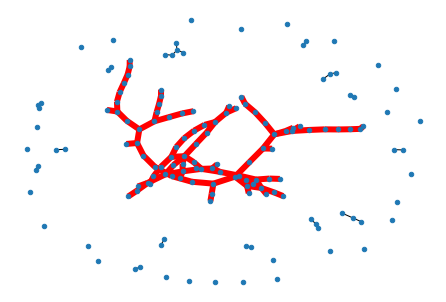

In [10]:
# inspiré de https://networkx.org/documentation/stable//auto_examples/drawing/plot_giant_component.html
G = nx.binomial_graph(150, 0.01)
# on fixe la position du réseau pour le graphe
pos=nx.spring_layout(G)
# On récupère les composantes et on les trie par ordre décroissant du nombre de noeud
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# Donc la première composante est donc la composante ayant le plus grand nombre de noeud
#(potentiellement giant)
G0 = G.subgraph(Gcc[0])
nx.draw(G, pos, with_labels=False, node_size=20)
nx.draw_networkx_edges(G0, pos, edge_color="r", width=6.0)

Retour à nos graphes de la question 2. Cherchons à évaluer la relation entre p et la moyenne de la composante la plus grande des graphes. 

Je veux créer une liste où j'obtiens pour chaque p la **moyenne du nombre de noeuds de la plus grande composante** sur 10 réplications. 

Nous en tirons de premières remarques : 

- A partir de $p= \frac{1}{N} = 0.001$, la taille de la plus grande composante se met soudainement à augmenter, comme s'il existait un effet de seuil. 

- A partir de $p = 0.01$, le graphe devient connecté puisque la taille de sa plus grande composante est de $N=1000$. Pour des probabilités inférieures, le graphe n'était donc pas connecté.  


In [11]:
avG=[]
for p in pList:
    thisAverage=[]
    for G in listGraphs[p]:
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        giant_nb_nodes = G.subgraph(Gcc[0]).number_of_nodes()
        thisAverage.append(giant_nb_nodes)
    print(p, np.mean(thisAverage))
    avG.append(np.mean(thisAverage))

5e-05 3.1
0.0001 3.1
0.0002 4.8
0.001 73.4
0.002 795.7
0.005 994.2
0.01 1000.0
0.015 1000.0
0.02 1000.0


Je trace la relation entre p et la taille moyenne de la plus grande composante. Cette fois-ci ce n'est pas du tout linéaire. 

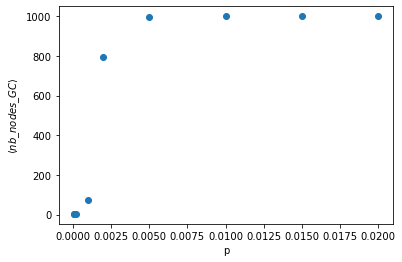

In [12]:
plt.plot(pList,avG,'o')
plt.xlabel('p')
plt.ylabel(r'$\langle nb\_nodes\_GC\rangle$')

plt.show()

Remarque : ce n'est pas non plus une distribution exponentielle. sauf peut-être avant d'atteindre le seuil maximal qui est le nombre de noeuds (cf. schéma suivant avec un fit seulement pour les plus petites valeurs de p). 

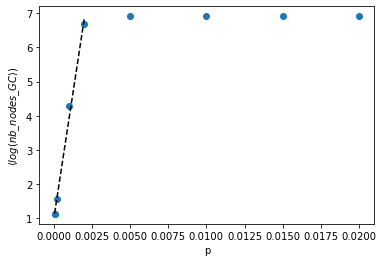

In [13]:
longueur = 5
coef = np.polyfit(pList[:longueur],np.log(avG)[:longueur], 1) #1 c'est le degré : linéaire
poly1d_fn = np.poly1d(coef) 
plt.plot(pList,np.log(avG),'o')
plt.plot(pList[:longueur], poly1d_fn(pList)[:longueur], '--k')
plt.xlabel('p')
plt.ylabel(r'$\langle log(nb\_nodes\_GC\rangle)$')
plt.show()

Nous avons la confirmation empirique de l'élément indiqué dans [cet article](https://www.quora.com/What-is-the-giant-component-in-graph-theory) : "Dans un graphe de Erdos–Renyi, si $p>\frac{1}{N}$ alors il y a probablement une composante géante et si $p<\frac{1}{N}$ il n'y en a probablement pas.". Ci-dessous quelques dernières simulations en faisant varier p autour de $\frac{1}{N}$ pour nous en convaincre ! 

In [14]:
pList2 = [0.0007,0.0008,0.0009,0.0011,0.0012,0.0013]

listGraphs2={}
for p in pList2:
    listGraphs2[p]=[]
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs2[p].append(G)

In [15]:
avG2=[]
for p in pList2:
    thisAverage=[]
    for G in listGraphs2[p]:
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        giant_nb_nodes = G.subgraph(Gcc[0]).number_of_nodes()
        thisAverage.append(giant_nb_nodes)
    if p==0.0011:
        print("Effet de seuil à 0.0010 !")
    print(p, np.mean(thisAverage))
    avG2.append(np.mean(thisAverage))

0.0007 19.9
0.0008 30.1
0.0009 63.0
Effet de seuil à 0.0010 !
0.0011 185.4
0.0012 279.9
0.0013 427.5


# Exercise 2 : Comparison with real networks

3 réseaux de Twitch de pays différents.  ([source](http://snap.stanford.edu/data/twitch-social-networks.html))

In [16]:
#import libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [17]:
#Read datasets
#Great Britain
infile='data/musae_ENGB_edges.csv'
GB=nx.read_edgelist(infile, delimiter=',')
#France
infile='data/musae_FR_edges.csv'
FR=nx.read_edgelist(infile, delimiter=',')
#Portugal
infile='data/musae_PTBR_edges.csv'
PT=nx.read_edgelist(infile, delimiter=',')

## 1. Average clustering coefficient for twitch network

<mark>1- Take the twitch networks from last lesson. Calculate their average clustering coefficient. Calculate the average clustering coefficient for several replicas of a random graph with the same number of nodes and the same number of edges (using p=2E/N(N-1) ) of the twich networks. Compare the real values and the random values. What do you observe? How can you interpret this?</mark>

In [18]:
listG = [GB,FR,PT]
listG_names={}
listG_names[GB]="GB"
listG_names[FR]="FR"
listG_names[PT]="PT"

In [19]:
N={}
for G in listG:
    N[listG_names[G]] =  G.number_of_nodes()
    
print("Nombre de noeuds")
for G in listG:
    print (listG_names[G],N[listG_names[G]])

Nombre de noeuds
GB 7126
FR 6549
PT 1912


In [20]:
E={}
for G in listG:
    E[listG_names[G]] =  G.number_of_edges()
    
print("Nombre de liens")
for G in listG:
    print (listG_names[G],E[listG_names[G]])

Nombre de liens
GB 35324
FR 112666
PT 31299


Quelques premiers résultats

- Le réseau britanique est celui dont le degré moyen et le clustering coefficient moyen sont les plus faibles. 
- Le réseau français a le degré moyen le plus élevé et un clustering coefficient moyen intermédiaire
- Le réseau portugais a un degré moyen élevé (presque aussi élevé que le français) et possède le clustering coefficient moyen le plus élevé. 


In [21]:
ak={}
for G in listG:
    ak[listG_names[G]] =  np.mean([degree for node, degree in G.degree()])
    
#Clusterings coefficients moyens
print("Degrés moyens")
for G in listG:
    print (listG_names[G],ak[listG_names[G]])

Degrés moyens
GB 9.914117316867808
FR 34.40708505115285
PT 32.73953974895397


In [22]:
avClust={}
for G in listG:
    avClust[listG_names[G]] =  nx.average_clustering(G)
    
#Clusterings coefficients moyens
print("Clusterings coefficients moyens")
for G in listG:
    print (listG_names[G],avClust[listG_names[G]])

Clusterings coefficients moyens
GB 0.13092821901472096
FR 0.22170550923594232
PT 0.3198952746693515


Pour chaque réseau twitch, on fixe $p = \frac{2\langle E\rangle}{N(N-1)}$ de manière à ce que le nombre de noeuds du graphe aléatoire soit, en moyenne, égal au nombre de noeuds du graphe initial. 

In [23]:
# On souhaite que p = (2*E)/(N*(N-1))
p={}
for G in listG:
    p[listG_names[G]] = (2 * E[listG_names[G]]) / (N[listG_names[G]] * (N[listG_names[G]]-1)) 

In [24]:
print("Valeur de p = (2*E)/(N*(N-1) pour chaque réseau twitch")
print(p)

Valeur de p = (2*E)/(N*(N-1) pour chaque réseau twitch
{'GB': 0.0013914550620165345, 'FR': 0.005254594540493715, 'PT': 0.017132150575067492}


Je vais associer à chaque réseau twitch 10 réplications aléatoires. 
Je vais donc faire 30 répétitions dans mes boucles.

In [25]:
# parameters
nRepl=10
print(nRepl*len(listG))

30


Je crée mes 30 graphes aléatoires. Ils ont tous un nombre de noeuds environ égal au graphe twitch initial dont ils font référence. 

In [26]:
# the list of random graphs is a dictionary: I will have a list of 10 graphes for each value of the N of the
# 3 twitch networks
listG_ER={}

for G in listG:
    listG_ER[listG_names[G]]=[]
    #loop on the replicas
    for i in range(nRepl):
        #print(i)
        G_ER=nx.erdos_renyi_graph(N[listG_names[G]],p[listG_names[G]])
        #G_ER=nx.watts_strogatz_graph(N[listG_names[G]], m, p[listG_names[G]])
        print(G_ER.number_of_edges())
        #G=nx.watts_strogatz_graph(N, m, p)
        listG_ER[listG_names[G]].append(G_ER)

35516
35158
35190
35527
35504
35119
35283
35441
35050
35290
112312
112688
112408
112806
113614
112371
112103
113087
112512
111788
31313
31488
31378
31265
31467
31390
31087
31372
31572
31116


Je calcule pour chaque graphe l'average clustering coefficient.

In [27]:
avClust_ER={}

for G in listG:
    G_ER = listG_ER[listG_names[G]]
    avClust_ER[listG_names[G]] = []
    for i in range(nRepl):
        G_ER_replica = G_ER[i]
        acc = nx.average_clustering(G_ER_replica)
        #print(acc)
        avClust_ER[listG_names[G]].append(acc)

Voici la valeur moyenne des *average clustering coefficients* des 10 graphes aléatoires comportant le même nombre de noeuds (en moyenne) que les réseaux réels twitchs. Ces valeurs sont bien plus faibles que pour les réseaux réels. On a en moyenne (cf. cours) : 
$$
\langle c\rangle = p =\frac{2\langle E\rangle}{N(N-1)}
$$

In [28]:
print("Moyenne des average clustering coefficients sur les 10 graphes aléatoires")
for G in listG:
    moyenne = np.mean(avClust_ER[listG_names[G]])
    print(listG_names[G],moyenne)
print("\nValeur de p = (2*E)/(N*(N-1) pour chaque réseau twitch")
print(p)

Moyenne des average clustering coefficients sur les 10 graphes aléatoires
GB 0.0013617059217607649
FR 0.0052888296574432414
PT 0.0172429978781376

Valeur de p = (2*E)/(N*(N-1) pour chaque réseau twitch
{'GB': 0.0013914550620165345, 'FR': 0.005254594540493715, 'PT': 0.017132150575067492}


Fonction pour tracer un boxplot des résultats pour observer la distribution en plus de la moyenne. 

In [29]:
def boxplot(pays, ajout_reseau_reel=False):
    if ajout_reseau_reel:
        custom_point = [Line2D([0], [0], marker='o', color='red', label=pays,
                                  markerfacecolor='red', markersize=10)]
        ax = sns.swarmplot(y=[avClust[pays]], color="red",size=10)
        ax.legend(custom_point, [pays])
        titre = "Comparaison entre l'average clustering coefficient\ndu réseau twitch et ceux des simulations ("+pays+")"
    else:
        titre = "Average clustering coefficient des réseaux aléatoires ("+pays+")"        
    ax = sns.boxplot(y=avClust_ER[pays])
    ax.set_title(titre)
    plt.show()

Nous avons vu pendant le cours dernier que pour les graphes aléatoires d'ER, l'*average clustering coefficient* tend vers 0 quand N devient grand contrairement aux réseaux réels pour lesquels l'average clustering coefficient est plus grand. 

Cela s'observe bien pour les réseaux réels twitch des 3 pays. Le point rouge qui correspond à l'average clustering coefficient du réseau réel est bien largement supérieur à la répartition des average clustering coefficient des 10 réseaux aléatoires. 

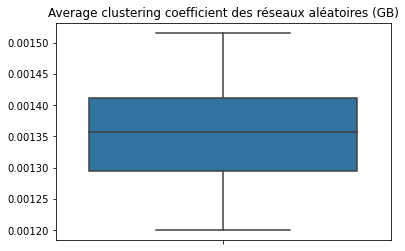

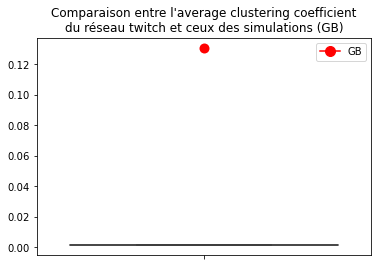

In [30]:
boxplot("GB", ajout_reseau_reel=False)
boxplot("GB", ajout_reseau_reel=True)

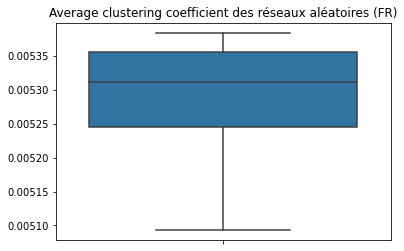

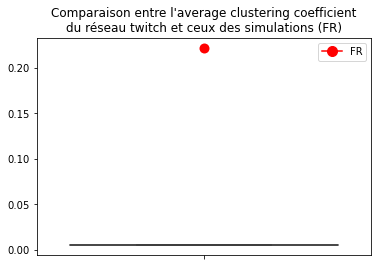

In [31]:
boxplot("FR", ajout_reseau_reel=False)
boxplot("FR", ajout_reseau_reel=True)

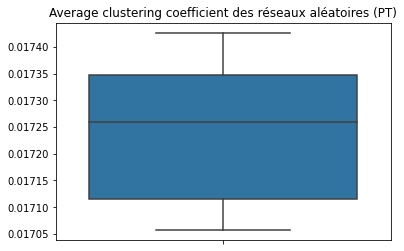

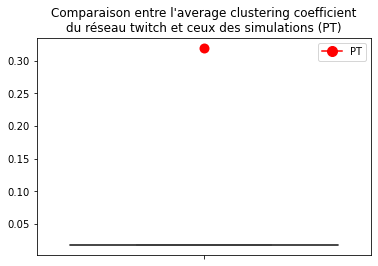

In [32]:
boxplot("PT", ajout_reseau_reel=False)
boxplot("PT", ajout_reseau_reel=True)

## 2. Significance test [OPTIONAL]

<mark>2. perform a significance test to see if the value observed in real networks is equal to the value observed in the random case</mark>

Le test de student, sans sa version `1samp` permet de tester l'égalité entre la moyenne d'un échantillon `a` et une certaines valeur `mean`. 

(H0) la moyenne d'un échantillon `a` d'observations  indépendantes est EGALE à la valeur `mean`.

(H1) la moyenne d'un échantillon `a` d'observations  indépendantes est DIFFERENTE de la valeur `mean`

Ce test suppose aussi que l'échantillon `a` est distribué normalement, ce qui n'est pas forcément le cas en pratique. 

**=> Les tests confirment que la valeur observée dans le réseau réel est différente de la valeur observée dans les cas aléatoires**

In [33]:
from scipy import stats

def ttest(pays):
    print(pays)
    a = avClust_ER[pays] #10 réseaux aléatoires
    popmean = avClust[pays] #réseau réel 
    stat,p = stats.ttest_1samp(a, popmean)
    if p > 0.05:
        print('La moyenne des average clustering coefficients des réseaux aléatoires est EGALE à celle du réseau réel')
    else:
        print('La moyenne des average clustering coefficients des réseaux aléatoires est DIFFERENTE de celle du réseau réel')
    print('(stat=%.3f, p=%.3f)' % (stat, p))
    print('\n')

In [34]:
ttest("GB")
ttest("FR")
ttest("PT")

GB
La moyenne des average clustering coefficients des réseaux aléatoires est DIFFERENTE de celle du réseau réel
(stat=-3958.002, p=0.000)


FR
La moyenne des average clustering coefficients des réseaux aléatoires est DIFFERENTE de celle du réseau réel
(stat=-7337.718, p=0.000)


PT
La moyenne des average clustering coefficients des réseaux aléatoires est DIFFERENTE de celle du réseau réel
(stat=-7061.376, p=0.000)




## 3. Preserving the degree structure [OPTIONAL]

<mark>3- A better way to randomize network structures consists in rewiring the links preserving the degree structure:</mark>

<mark>(1) take two links (n1,n2) and (n3,n4). </mark>

<mark>(2)exchange one of the extremes in order to have (n1,n4) and (n3,n2)</mark>

<mark>(3) Iterate this procedure for a number of times proportional to the number of edges</mark>

<mark>Write the script performing this procedure and apply this to one of the Twitch networks.</mark>



La fonction `permutations` permet d'implémenter les permutations proposées par l'énoncé.

In [35]:
def permutations(G,nbIters, plot=False):
    G = G.copy()
    if plot==True:
            pos=nx.spring_layout(G)
            plt.figure(figsize=(6,2))
            nx.draw(G, pos, with_labels=True, node_size=200)
            plt.show()
    for i in range(0,nbIters):
        #print(i)
        allEdges=G.edges()
        tirage = random.sample(allEdges,2)
        n1 = tirage[0][0]
        n2 = tirage[0][1]
        n3 = tirage[1][0]
        n4 = tirage[1][1]
        if plot==True:
            print(tirage)
            plt.figure(figsize=(6,2))
            nx.draw(G, pos, with_labels=True, node_size=200)
        G.remove_edge(n1,n2)
        G.remove_edge(n3,n4)
        G.add_edge(n1,n4)
        G.add_edge(n3,n2)
        if plot==True:
            nx.draw_networkx_edges(G, edgelist=[(n1,n2),(n3,n4)], pos=pos, edge_color="r", width=3.0)
            nx.draw_networkx_edges(G, edgelist=[(n1,n4),(n3,n2)], pos=pos, edge_color="g", width=3.0, style="dashed")
            plt.show()
    return(G)

Illustration de l'algorithme sur un exemple simple : 

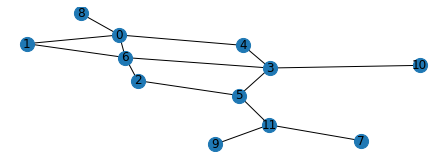

[(0, 1), (7, 11)]


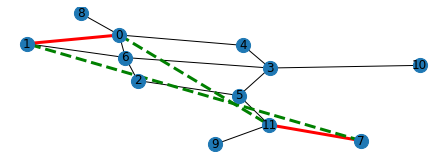

[(2, 5), (1, 6)]


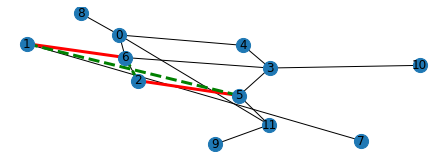

In [41]:
Gtest=nx.erdos_renyi_graph(12,0.2)
Gtest_permut= permutations(Gtest,nbIters=2,plot=True)

Application sur les données françaises de twitch. Je modifie le réseau initial de twitch par permutations.

In [37]:
PT_permut = permutations(PT,nbIters=len(PT.edges()),plot=False)

Je calcule l'average clustering coefficient du nouveau graphe.

In [38]:
avClust_ER_permut_PT= nx.average_clustering(PT_permut)
print(avClust_ER_permut_PT)

0.09512300351604067


Je le représente sur l'histogramme de la première question. 

**=> On remarque que la création d'un réseau aléatoire par permutations des noeuds de l'ancien réseau (avec un nombre d'itérations égal au nombre de liens) conserve un peu mieux le clustering coefficient du réseau réel que l'implémentation d'un réseau aléatoire pur (point bleu plus proche du point rouge que la barre noire ne l'est) mais il demeure très faible (point bleu bien en dessous du point rouge).**


Il pourrait être intéressant de tester avec un nombre d'itérations plus important mais cela prend un temps computationnel assez important. 

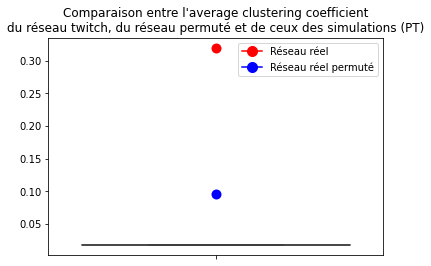

In [39]:
custom_points = [Line2D([0], [0], marker='o', color='red', label="Réseau réel",
                                  markerfacecolor='red', markersize=10),
                 Line2D([0], [0], marker='o', color='blue', label="Réseau réel permuté",
                                  markerfacecolor='blue', markersize=10),
                ]
ax = sns.swarmplot(y=[avClust["PT"]], color="red",size=10)
ax = sns.swarmplot(y=[avClust_ER_permut_PT], color="blue",size=10)
ax.legend(custom_points, ["Réseau réel","Réseau réel permuté"])
titre = "Comparaison entre l'average clustering coefficient\ndu réseau twitch, du réseau permuté et de ceux des simulations ("+"PT"+")"
ax = sns.boxplot(y=avClust_ER["PT"])
ax.set_title(titre)
plt.show()